In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
748,0,19.0,53.1000
679,1,36.0,512.3292
306,1,NaN,110.8833
701,1,35.0,26.2875
258,1,35.0,512.3292


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [6]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6927374301675978

In [13]:
from sklearn.model_selection import cross_val_score

# print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))

np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.6577278401997504

## With using binning

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [16]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [17]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

/home/suhas/.local/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [19]:
X_test_trf

array([[ 7.,  7.],
       [ 8.,  6.],
       [ 2.,  4.],
       [ 0., 11.],
       [ 1.,  6.],
       [ 5., 13.],
       [ 7.,  2.],
       [ 1.,  8.],
       [ 1.,  2.],
       [ 2., 10.],
       [ 9., 12.],
       [11.,  4.],
       [ 7.,  9.],
       [ 7.,  0.],
       [ 9.,  7.],
       [ 1., 11.],
       [10., 12.],
       [ 7.,  2.],
       [ 5.,  7.],
       [11., 12.],
       [ 4.,  3.],
       [ 9., 10.],
       [ 2.,  2.],
       [ 2.,  5.],
       [ 7.,  7.],
       [ 1., 10.],
       [10., 10.],
       [ 8.,  7.],
       [ 0., 10.],
       [ 8.,  2.],
       [ 2.,  3.],
       [ 3.,  2.],
       [ 7., 11.],
       [ 7.,  1.],
       [ 2.,  4.],
       [ 5.,  7.],
       [ 6., 11.],
       [ 7.,  2.],
       [ 7., 11.],
       [ 7.,  3.],
       [ 3., 13.],
       [ 6.,  0.],
       [ 7.,  4.],
       [ 7.,  2.],
       [11.,  7.],
       [ 1., 11.],
       [ 2.,  4.],
       [ 4.,  5.],
       [ 4.,  0.],
       [12., 14.],
       [ 0.,  8.],
       [12., 14.],
       [10.,

In [21]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  8.4       , 18.        , 21.        , 23.        ,
       25.        , 28.        , 29.69911765, 31.        , 34.        ,
       38.        , 44.        , 51.        , 80.        ])], dtype=object)

In [23]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:,1]
})

In [24]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [25]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
459,29.699118,7.0,7.75,2.0,"(28.0, 29.699]","(7.229, 7.75]"
492,55.000000,12.0,30.50,11.0,"(51.0, 80.0]","(29.355, 39.688]"
806,39.000000,10.0,0.00,0.0,"(38.0, 44.0]",NaN
684,60.000000,12.0,39.00,11.0,"(51.0, 80.0]","(29.355, 39.688]"
440,45.000000,11.0,26.25,10.0,"(44.0, 51.0]","(26.0, 29.355]"


In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [27]:
accuracy_score(y_test,y_pred2)

0.6312849162011173

In [28]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

/home/suhas/.local/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


0.6554681647940075

In [29]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6588389513108613


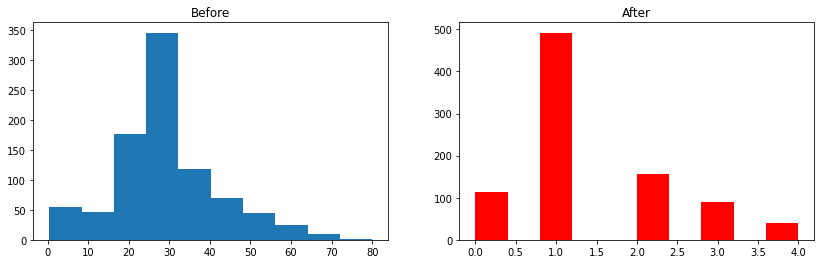

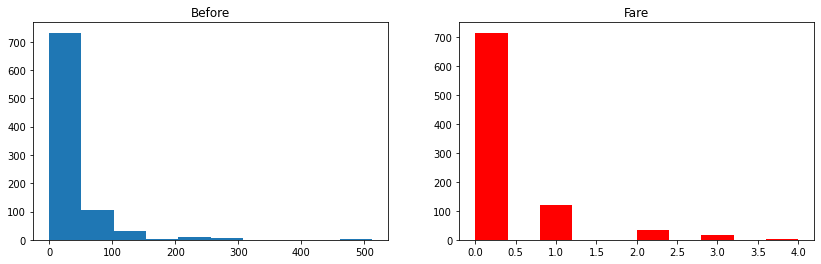

In [30]:
discretize(5,'kmeans')